# Анализ компьютерных игр для интернет-магазина "Стримчик"

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников нам доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Для анализа у нас в распоряжении данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

##  Изучение данных из файла

Перед началом работы над таблицей изучим общую информацию о файле наших исходных данных: сколько имеется столбцов у таблицы, названия этих столбцов и их типов, а также количество строк каждого столбца. Это нужно для того, чтобы определить, в каких столбцах есть пустые значения и насколько их много.

In [1]:
import pandas as pd
df = pd.read_csv('/datasets/games.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Из описания проекта мы уже знаем, что таблица имеет 11 столбцов:
* Name - название игры
* Platform - платформа
* Year_of_Release - год выпуска
* Genre - жанр игры
* NA_sales - продажи в Северной Америке (миллионы проданных копий)
* EU_sales - продажи в Европе (миллионы проданных копий)
* JP_sales - продажи в Японии (миллионы проданных копий)
* Other_sales - продажи в других странах (миллионы проданных копий)
* Critic_Score - оценка критиков (максимум 100)
* User_Score - оценка пользователей (максимум 10)
* Rating - рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Общее количество строк - 16715, пять столбцов имеют тип данных object, а 6 - вещественный тип float64. В таблице имеются пропущенные данные,так как количество значений встолбцах отличаются.

Изучим внешний вид таблицы, прочтем первые 5 строк:

In [2]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Вывод

Каждая строчка таблицы содержит данные об игре: название игры, платформа, на которой она выпущена, год выпуска, жанр игры, объем продаж по регионам, а также рейтинги игры - пользовательский, критиков и от организации ESRB, определяющий возрастную категорию игре.

В таблице имеются пропуски в столбцах, надо определить их причину и решить, что дальше с ними делать. Название столбцов также необходимо привести к более убоному виду для удобства работы.

## Предобработка данных

### Переименование столбцов

Для удобства работы с данными приведем к общему нижнему регистру название столбов в нашей таблице.

In [3]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Обработка пропусков

Проверим данные на наличие пропусков.

In [4]:
df.isnull().mean()

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64

Пропуски данных имеются в столбцах name, year_of_release, genre, critic_score, user_score, rating. Рассмотрим подробнее столбец name.

In [5]:
df[df['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Всего две игры имеют пропуски в названии игры и жанре. По этим данным есть только дата выпуска и продажи. Так как этих строк всего ли 2 и по остальным данным восстановить пропущенную информаю невозможно, что удалим их из нашей таблицы.

In [6]:
df = df[~df['name'].isnull()]

Рассмотрим внимательнее игры, у которых не указан год выхода игр.

In [7]:
df[df['year_of_release'].isnull()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


Как видно, у некоторых игр в названиях игр присуствует год. Давайте для примера выясним в каких годах выходили игры Madden NFL 2004, FIFA Soccer 2004 и wwe Smackdown vs. Raw 2006. Из открытых источник мы выяснили, что данные игры выпускались в 2003, 2003 и 2005 соотвественно. Это означает, что для игр жанра Sports игры нового спортивного сезона выпускались как правило в конце предыдущего календарного года. 

Выясним диапазон выхода игр.

In [8]:
df['year_of_release'].agg(['min', 'max'])

min    1980.0
max    2016.0
Name: year_of_release, dtype: float64

Создадим список с датами выхода игр.

In [9]:
list_year = [x + 1 for x in range(1979, 2016)]

Напишем программу, которая находит в названии игры 4 цифры.

In [10]:
import re 
import numpy as np
def find_year(string):
    result = re.search(r'\d{4}', string)
    try:
        return result.group()
    except:
        return result

Создадим новый столбец year, куда запишем найденные 4 цифры. Затем переведем их в формат числовых данных.

In [11]:
df['year'] = df['name'].apply(find_year)

In [12]:
df['year'] = df['year'].fillna(0)
df['year'] = df['year'].astype(int)

Теперь удалим из данного столбца найденные числа, не входящих в диапазон (1980-2016) годов выхода игр.

In [13]:
df['year'] = df['year'].where(df['year'].isin(list_year) & df['year_of_release'].isnull())

Так как большинство игр выпускают с играми на следующий сезон, то уменьшим наш найденный год на единицу. 

In [14]:
df['year'] = df['year'] - 1

Посмотрим, что у нас получилось.

In [15]:
df.query('not year.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,2003.0
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,2003.0
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,2005.0
1650,NASCAR Thunder 2003,PS2,NaN,Racing,0.60,0.46,0.00,0.16,84.0,8.7,E,2002.0
2572,PES 2009: Pro Evolution Soccer,PSP,NaN,Sports,0.04,0.33,0.26,0.17,NaN,NaN,NaN,2008.0
3486,Madden NFL 2002,XB,NaN,Sports,0.53,0.02,0.00,0.03,90.0,8.1,E,2001.0
4775,NFL GameDay 2003,PS2,NaN,Sports,0.20,0.15,0.00,0.05,60.0,tbd,E,2002.0
5156,NBA Live 2003,XB,NaN,Sports,0.31,0.04,0.00,0.01,82.0,8.8,E,2002.0
5336,Tomb Raider (2013),PC,NaN,Action,0.06,0.25,0.00,0.04,86.0,8.5,M,2012.0
5655,All-Star Baseball 2005,PS2,NaN,Sports,0.16,0.12,0.00,0.04,72.0,8.6,E,2004.0


In [16]:
df.loc[[3486, 5336, 13195, 13929, 15953, 16373], 'year'] = df.loc[[3486, 5336, 13195, 13929, 15953, 16373], 'year'] + 1

In [17]:
df.query('not year.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,2003.0
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,2003.0
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,2005.0
1650,NASCAR Thunder 2003,PS2,NaN,Racing,0.60,0.46,0.00,0.16,84.0,8.7,E,2002.0
2572,PES 2009: Pro Evolution Soccer,PSP,NaN,Sports,0.04,0.33,0.26,0.17,NaN,NaN,NaN,2008.0
3486,Madden NFL 2002,XB,NaN,Sports,0.53,0.02,0.00,0.03,90.0,8.1,E,2002.0
4775,NFL GameDay 2003,PS2,NaN,Sports,0.20,0.15,0.00,0.05,60.0,tbd,E,2002.0
5156,NBA Live 2003,XB,NaN,Sports,0.31,0.04,0.00,0.01,82.0,8.8,E,2002.0
5336,Tomb Raider (2013),PC,NaN,Action,0.06,0.25,0.00,0.04,86.0,8.5,M,2013.0
5655,All-Star Baseball 2005,PS2,NaN,Sports,0.16,0.12,0.00,0.04,72.0,8.6,E,2004.0


Заполним столбцец year_of_release данными из столбца year.

In [18]:
df['year_of_release'] = df['year_of_release'].where(~df['year'].isin(list_year) & ~df['year_of_release'].isnull(), \
                                                    df['year'])

In [19]:
df[~df['year'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year
183,Madden NFL 2004,PS2,2003.0,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,2003.0
377,FIFA Soccer 2004,PS2,2003.0,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,2003.0
475,wwe Smackdown vs. Raw 2006,PS2,2005.0,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,2005.0
1650,NASCAR Thunder 2003,PS2,2002.0,Racing,0.60,0.46,0.00,0.16,84.0,8.7,E,2002.0
2572,PES 2009: Pro Evolution Soccer,PSP,2008.0,Sports,0.04,0.33,0.26,0.17,NaN,NaN,NaN,2008.0
3486,Madden NFL 2002,XB,2002.0,Sports,0.53,0.02,0.00,0.03,90.0,8.1,E,2002.0
4775,NFL GameDay 2003,PS2,2002.0,Sports,0.20,0.15,0.00,0.05,60.0,tbd,E,2002.0
5156,NBA Live 2003,XB,2002.0,Sports,0.31,0.04,0.00,0.01,82.0,8.8,E,2002.0
5336,Tomb Raider (2013),PC,2013.0,Action,0.06,0.25,0.00,0.04,86.0,8.5,M,2013.0
5655,All-Star Baseball 2005,PS2,2004.0,Sports,0.16,0.12,0.00,0.04,72.0,8.6,E,2004.0


Удалим столбец year, он нам уже не понадобится.

In [20]:
df.drop('year', axis = 1, inplace = True)

Рассмотрим внимательно столбец user_score. Посмотрим, какие значения он принимает.

In [21]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Среди значений пользовательского рейтинга присутсвует параметр tbd, который означает, что значение будет определено (To Be Determined), скорее всего оценок пользователей было слишком мало, чтобы можно было их указывать.

In [22]:
df[df['user_score']=='tbd'].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E


Так как определить рейтинг нельзя, отметим данные игры как игры, не имеющего рейтинга.

In [23]:
df['user_score'] = df['user_score'].where(df.user_score!='tbd')

Рассмотрим столбец с рейтингом игры по позрастному принципу.

In [24]:
df['rating'].value_counts(dropna = False)

NaN     6764
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

In [25]:
df[df['rating'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Рассмотрим столбец, содержайщий оценку критиков.

In [26]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

На первы взгляд артефактов нет, рассмотрим распределение оценко критиков и пользователей с помощью столбчатых диаграмм

Text(0, 0.5, 'counts of score')

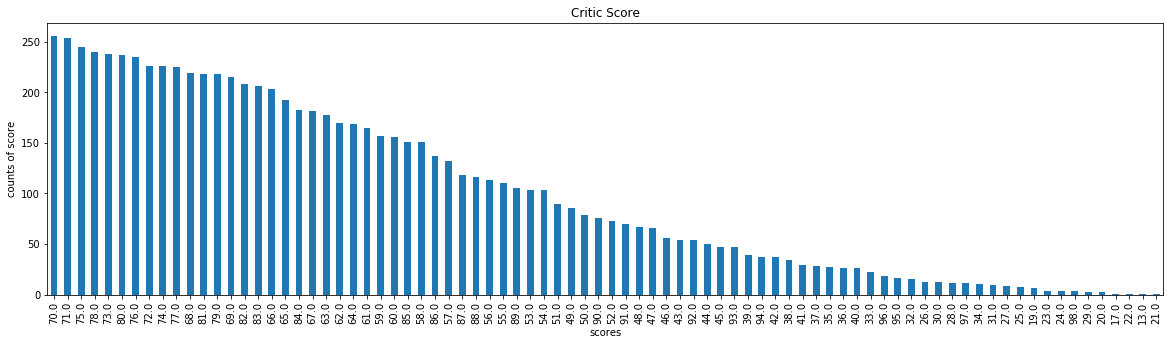

In [27]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
df['critic_score'].value_counts().plot(kind = 'bar', figsize = (20, 5), title = 'Critic Score')
plt.xlabel('scores')
plt.ylabel('counts of score')

Text(0, 0.5, 'counts of score')

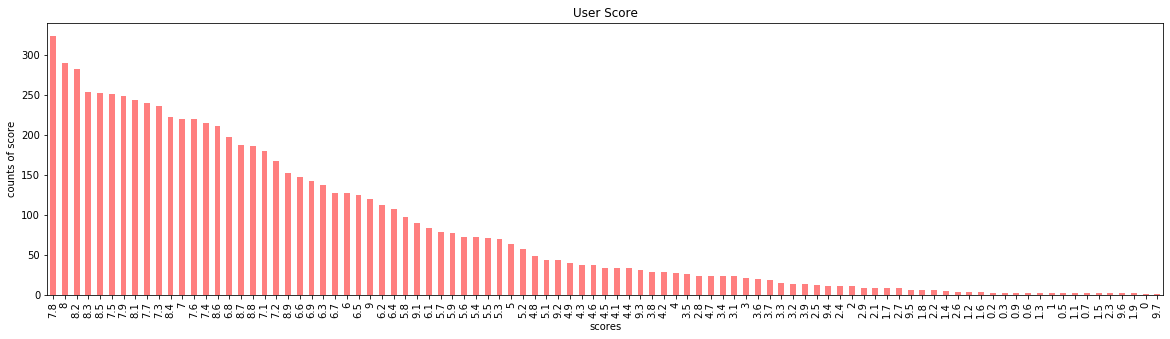

In [28]:
df['user_score'].value_counts().plot(kind = 'bar', figsize = (20, 5), color = 'red',  title = 'User Score', \
                                     alpha = 0.5)
plt.xlabel('scores')
plt.ylabel('counts of score')

Аномалий в распределении оценок не обнаружено.

Рассмотрим столбец, содержащий платформы, на которых были выпущены игры.

In [29]:
df['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

 Рассмотрим теперь что у нас с пропусками в нашей таблице.

In [30]:
df.isnull().mean()

name               0.000000
platform           0.000000
year_of_release    0.015078
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513133
user_score         0.545863
rating             0.404715
dtype: float64

Теперь пропуски присутствуют только в столбце, содержащий год выпуска игры, рейтинг игры по ESRB, а также оценки пользователей и критиков. Процент пропусков в столцбе year_of_releas очень маленкий, поэтому мы можем удалить их без особых потерь.

In [31]:
df = df[~df['year_of_release'].isnull()]

In [32]:
df.isnull().mean()

name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.514307
user_score         0.546018
rating             0.405929
dtype: float64

Теперь пропуски присутствуют только в столбцах, содержащие рейтинг и оценки пользователей и критиков.

### Замена типов данных

Рассмотрим еще раз информацию о нашей таблице.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16461 entries, 0 to 16714
Data columns (total 11 columns):
name               16461 non-null object
platform           16461 non-null object
year_of_release    16461 non-null float64
genre              16461 non-null object
na_sales           16461 non-null float64
eu_sales           16461 non-null float64
jp_sales           16461 non-null float64
other_sales        16461 non-null float64
critic_score       7995 non-null float64
user_score         7473 non-null object
rating             9779 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [34]:
df['user_score'] = df['user_score'].fillna(0)
df['user_score'] = df['user_score'].astype(float)
df['user_score'] = df['user_score'].where(df.user_score != 0)

Переведем столбец year_of_release к целочисленному формату int64.

In [35]:
df['year_of_release'] = df['year_of_release'].astype(int)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Создадим новый столбец all_sales, куда запишем суммарные продажи по всем регионам.

In [36]:
df['all_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

## Исследовательский анализ данных

Построим солбчатую диаграмму, где будет отображено количество выпущенных игр в разрезе лет. 

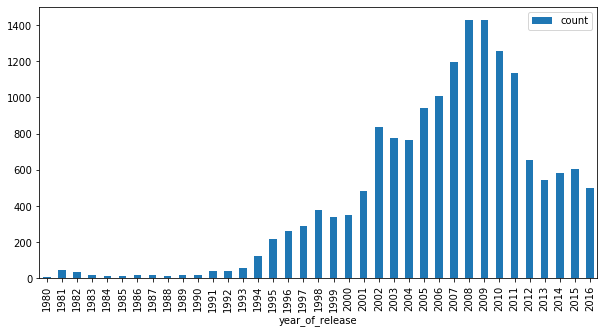

In [37]:
df.groupby('year_of_release')['name'].agg(['count']).plot(kind = 'bar', figsize = (10, 5))

Как видно и диаграммы, до 2001 года игр выпускалось довольно мало, поэтому мы можем рассматривать игры, выпущенные после 2001 года.

In [38]:
df= df[df['year_of_release'] > 2000]

### Выбор потециально прибыльных платформ

Рассмотрим 15 платформ с самыми большими суммарным прожадам игр в нашей таблице.

In [39]:
df.groupby('platform')['all_sales'].agg(['count', 'sum']).sort_values(by='sum', ascending=False).head(15)

,count,sum
platform,,
PS2,2052,1208.11
X360,1234,961.30
PS3,1306,931.34
Wii,1286,891.18
DS,2121,802.77
PS4,392,314.14
GBA,810,312.81
PSP,1195,290.34
3DS,512,257.81


Создадим список list_platform куда запишем 15 самых прибыльных платформ.

In [40]:
list_platform = (
    df.groupby('platform')['all_sales'].agg(['count', 'sum']).sort_values(by='sum', 
                                                                          ascending=False).head(15).index.to_list()
)
list_platform

['PS2',
 'X360',
 'PS3',
 'Wii',
 'DS',
 'PS4',
 'GBA',
 'PSP',
 '3DS',
 'XB',
 'PC',
 'GC',
 'XOne',
 'WiiU',
 'PSV']

Теперь создадим сводную таблицу, содержащую данные о суммарных продажах игр в разрезе платформ и годов выпуска игр.

In [41]:
pivot_platform = df.groupby(['platform', \
                             'year_of_release'] \
                           )['all_sales'].agg(['count', 'sum']).reset_index().set_index('year_of_release')

In [42]:
pivot_platform.head()

,platform,count,sum
year_of_release,,,
2011,3DS,116,63.20
2012,3DS,93,51.36
2013,3DS,91,56.57
2014,3DS,80,43.76
2015,3DS,86,27.78


Выведим столбчатые диаграммы распределения суммарных продаж по годам для каждой платформы отдельно.

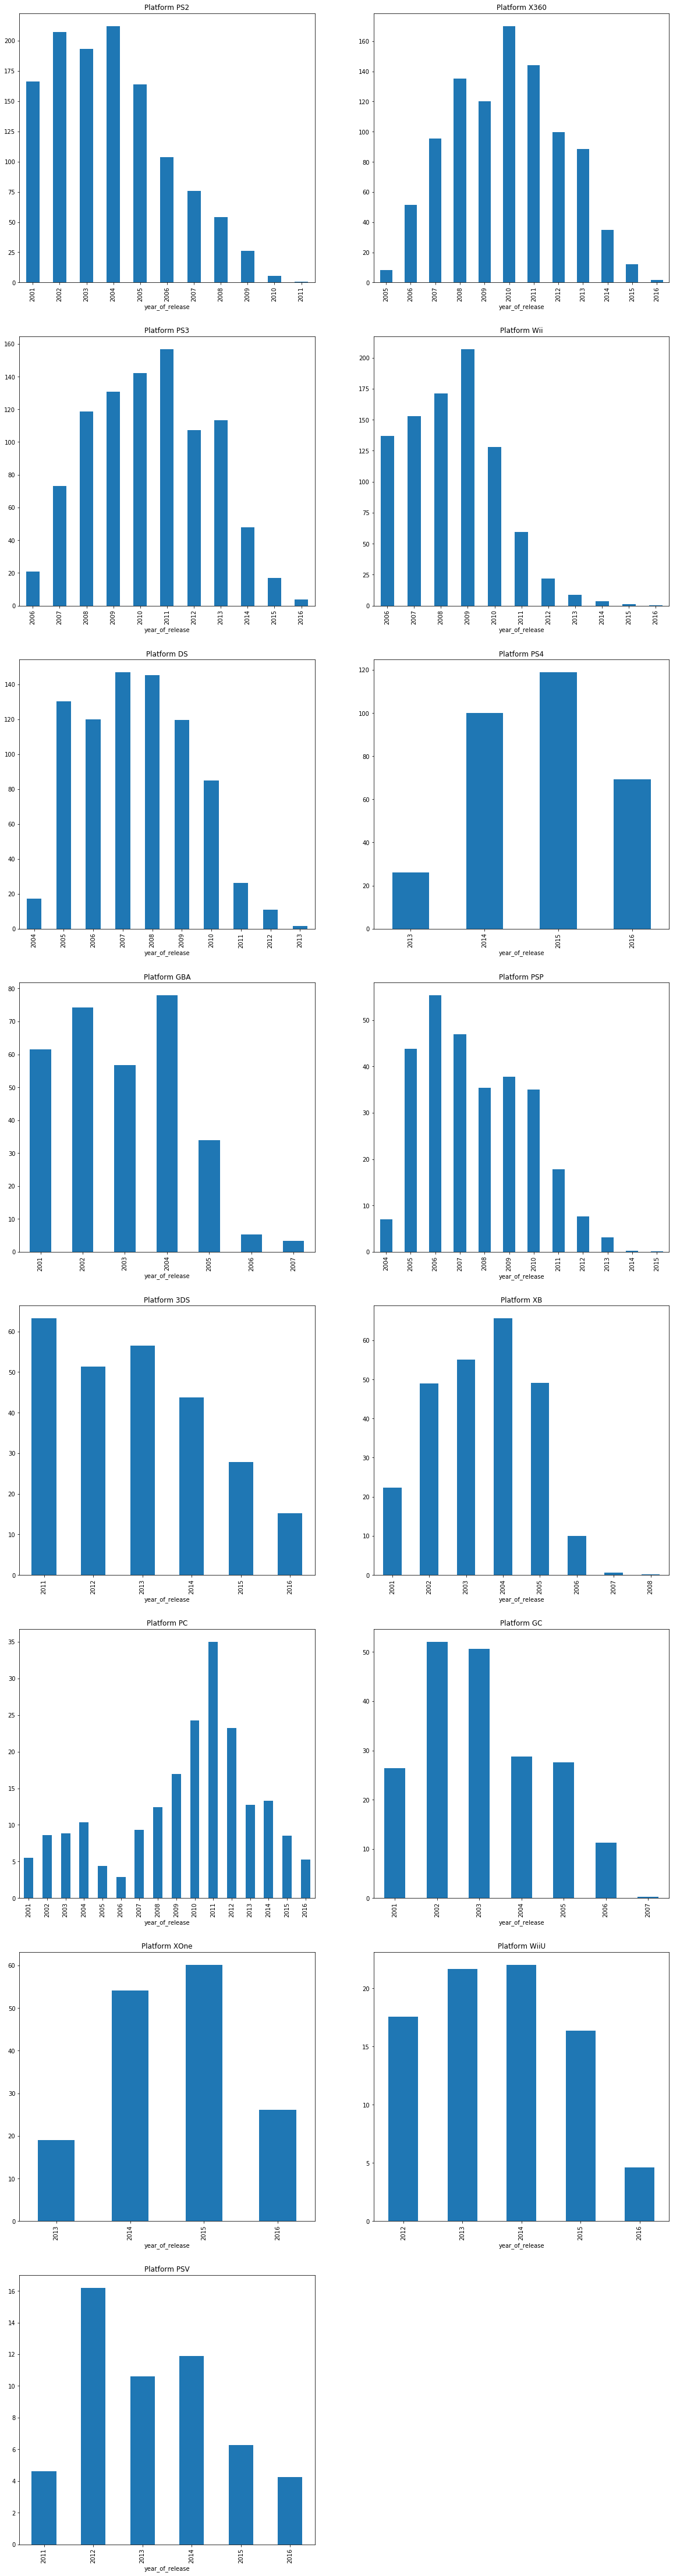

In [43]:
import numpy as np
count = 1
rows = int(np.ceil(len(list_platform) / 2))
for element in list_platform:
    plt.subplot(rows, 2, count)
    axs = pivot_platform.query('platform == @element')['sum'].plot(kind = 'bar', figsize = (20, 80))  
    plt.title(f'Platform {element}')
    count += 1

Как видно из данных, большинство моделей в течение 6 лет чувствует себя хорошо, а потом либо выходит новая версия консоли, либо рынок завоевывает новая платформа. Особняком стоит игры, выпущенные для персонального комьютера PC. Для этой платформы всегда есть своя ниша, несмотря на взлеты и падения.

Среди портативных консолей на 2016 год представлены Nintendo 3DS и Microsoft PSV. По продажам болле перспективной является Nintendo 3DS, несмотря на падение продаж. Такой вид платформ всегда имеют своих покупателей. Консоль же PSV не смогла повторить успех своего предшественника PSP по объемам продаж.

Такая же картина преставлена с консолями Nintendo WiiU и Nintendo Wii. Вышедшея на замену очень популярной в свое время консоли Wii, WiiU не смогла повторить ее успех. А так как консоли более перспективной 3DS и менее перспективной WiiU выпускаются одной фирмой, но скорее всего они возьмут курс на развитие консоли, которая приносит больше прибыли и не имеет серьезных конкурентов.

Консоли серии Microsoft Xbox и Sony PlayStation всегда имеют своих покупателей, это видно объемам продаж, поэтому они являются перспективными. Консоли PS4 и XOne стабильно растут по продажам, если не смотреть на данные 2016 года, так как они неполные.

Итак, среди представленных платформ наиболее перспективными являются:
* PC
* Sony PlayStation 4
* Microsoft Xbox One
* Nintendo 3DS



Создадим список перспективных платформ.

In [44]:
list_platform_perp = ['PC', 'PS4', 'XOne', '3DS']

Последнее поколение консолей последний раз обновлялось примерно в 2012-2013 годах. Выберем для анализа последние 3 года, так как данные на 2016 год у нас неполные.

In [45]:
df = df[df['year_of_release'] >= 2014]

In [46]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98


Такой же фильтр применим для свобной таблице в разрезе платформ.

In [47]:
pivot_platform = pivot_platform.reset_index()
pivot_platform.head()

,year_of_release,platform,count,sum
0,2011,3DS,116,63.20
1,2012,3DS,93,51.36
2,2013,3DS,91,56.57
3,2014,3DS,80,43.76
4,2015,3DS,86,27.78


In [48]:
pivot_platform = pivot_platform[pivot_platform['year_of_release'] >= 2014]
pivot_platform.head()

,year_of_release,platform,count,sum
3,2014,3DS,80,43.76
4,2015,3DS,86,27.78
5,2016,3DS,46,15.14
50,2014,PC,47,13.28
51,2015,PC,50,8.52


Построим диаграммы размаха по всем платформам.

Text(0.5, 1.0, 'Sales on Platforms')

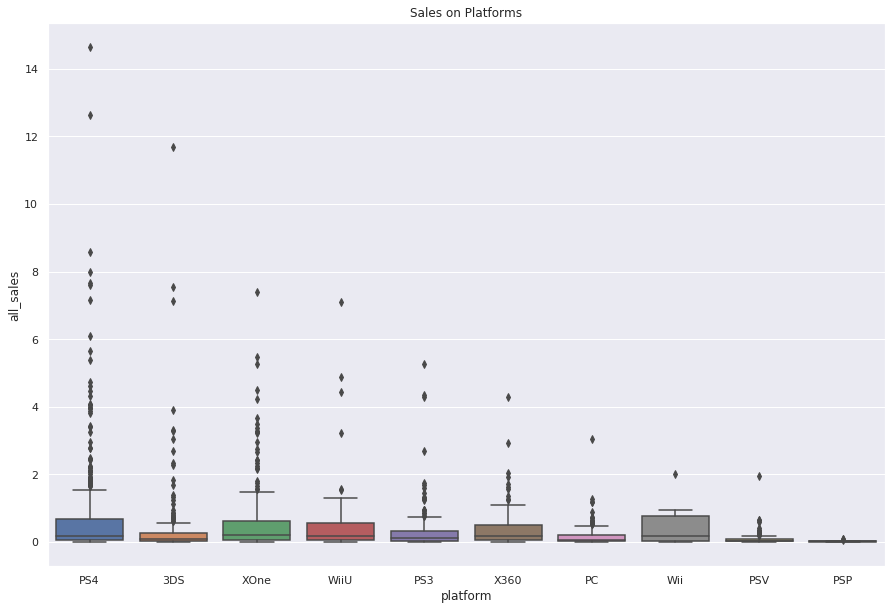

In [49]:
import seaborn as sns
sns.set(rc={"figure.figsize": (15, 10)})

sns.boxplot(data=df, y='all_sales', x='platform')
plt.title('Sales on Platforms')

Text(0.5, 1.0, 'Sales on Platforms less 2 millions')

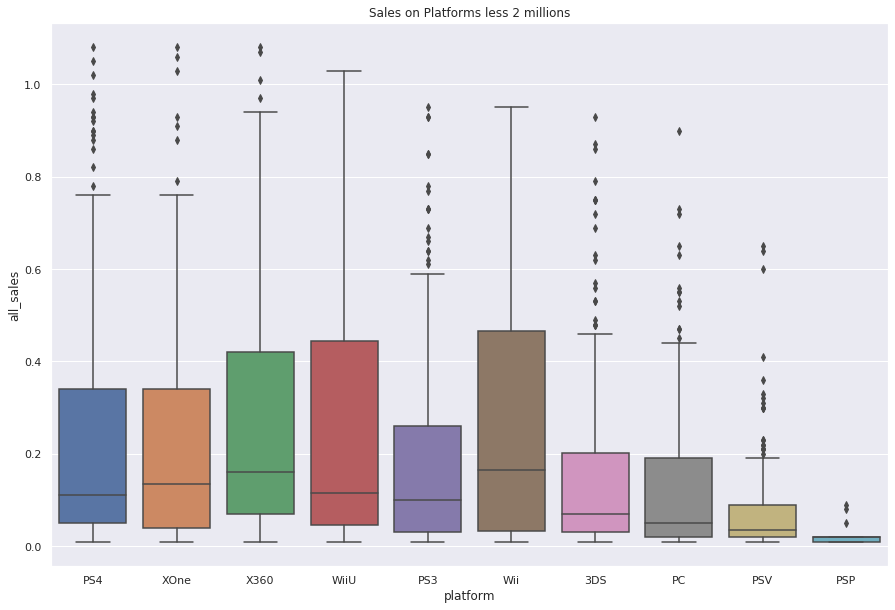

In [50]:
sns.boxplot(data=df.query('all_sales < 1.1'), y='all_sales', x='platform')
plt.title('Sales on Platforms less 2 millions')

Самы прибыльные игры выпускались на платформах PS4, 3DS, XOne, WiiU , X360 и PS. 


Платформы PS4 и XOne - это платформы последнего поколения, в каждом годом продажи увеличиваются, консоль 3DS - самая популярная портативная консоль, она лидер на своей нише, консоль WiiU не смогла и близко догнать по своим продажам своего предшественника, с каждый годом продажи падают. Платформы PS3 и Х360 уходят с рынка, их заменили более новые платформы. РС всегда имеет свою нишу, никаких предпосылок, что она уйдет пока нет. Остальные платформы не являются перспективными.

Игры для персональных компьютеров PC в последние годы упали, но их все равно будут выпускать, так как это своя небольшая ниша.

Продажи игр для PS4 и XOne стабильно большие.

Объемы продаж портативных консолей 3DS лидируют по сравнению с другими портативными консолями PSV и PSP. Это отдельная ниша, и сильных конкурентов у данной консоли на данный момент нет.

### Анализ объема продаж в разрезе платформ 

Напишем функцию scatter_sales, которая вычисляет корреляцию продаж игр между отзывами критиков и пользователей, а также строит 2 графика рассеивания зависимости стоимости продаж от отзывов критиков и от отзывов пользователей по выбранной платформе.

In [51]:
def scatter_sales(platform):
    
    sns.set(rc={"figure.figsize": (15, 10)})
    _, axs = plt.subplots(2, 2)
    axs = axs.ravel()
    
    
    plt.subplot(2, 1, 1)
    ax = sns.heatmap(df.query(
        'platform == @platform'
    ).loc[:, ['all_sales', 'critic_score', 'user_score']].corr(), cmap="YlGnBu", annot=True)
    plt.title(f'correlation graph on {platform}')
    
    plt.subplot(2, 2, 3)
    sns.set(rc={"figure.figsize": (15, 15)})
    axs = sns.scatterplot(data=df.query(
        'platform == @platform'
    ), x="user_score", y="all_sales")
    plt.title(f'user score of the games on {platform}')
    plt.grid(True)
    plt.ylabel('all_sales')
    plt.xlabel('user_score')
    
    plt.subplot(2, 2, 4)
    axs = sns.scatterplot(data=df.query(
        'platform == @platform'
    ), x="critic_score", y="all_sales")
    plt.title(f'critic score of the games on {platform}')
    plt.ylabel('all_sales')
    plt.xlabel('critic_score')

Вызовим функцию scatter_sales для перспективных платформ.

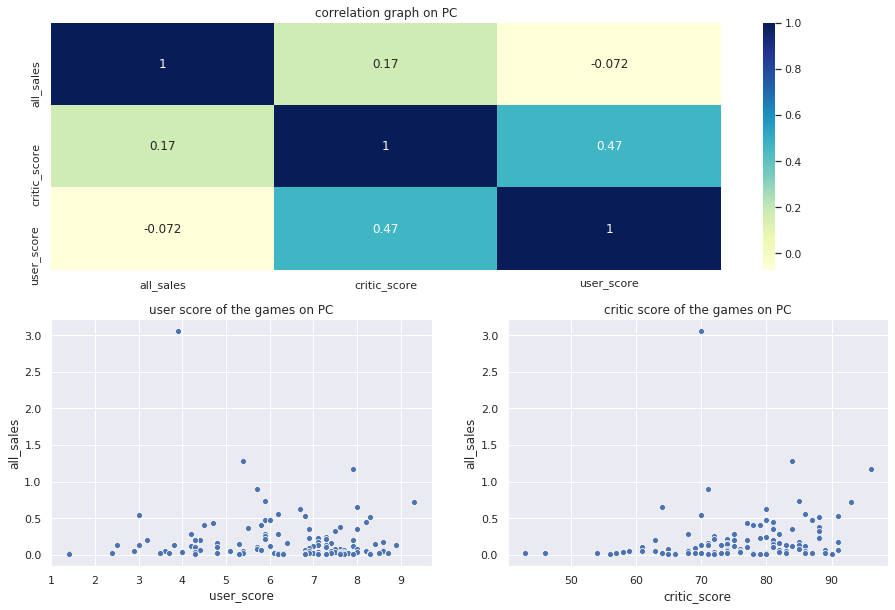

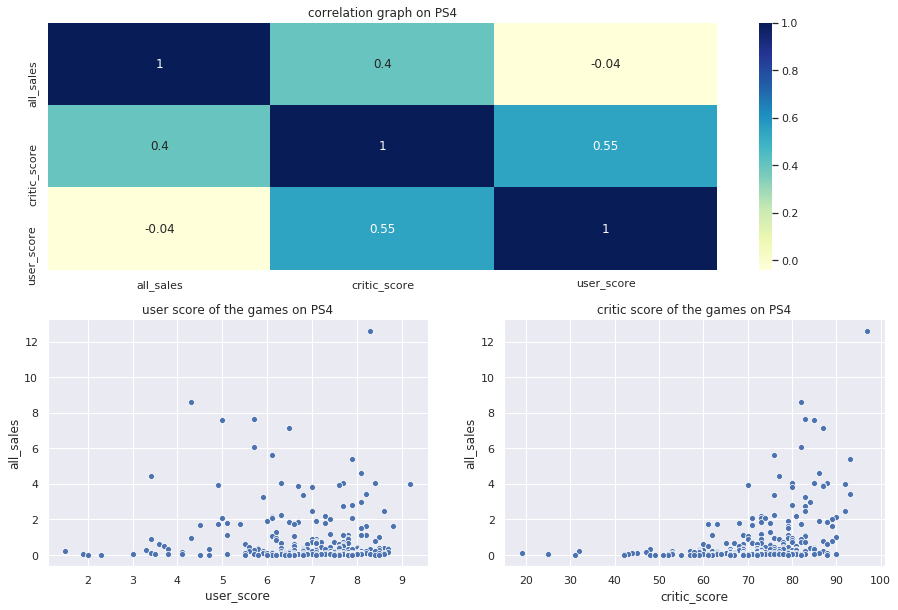

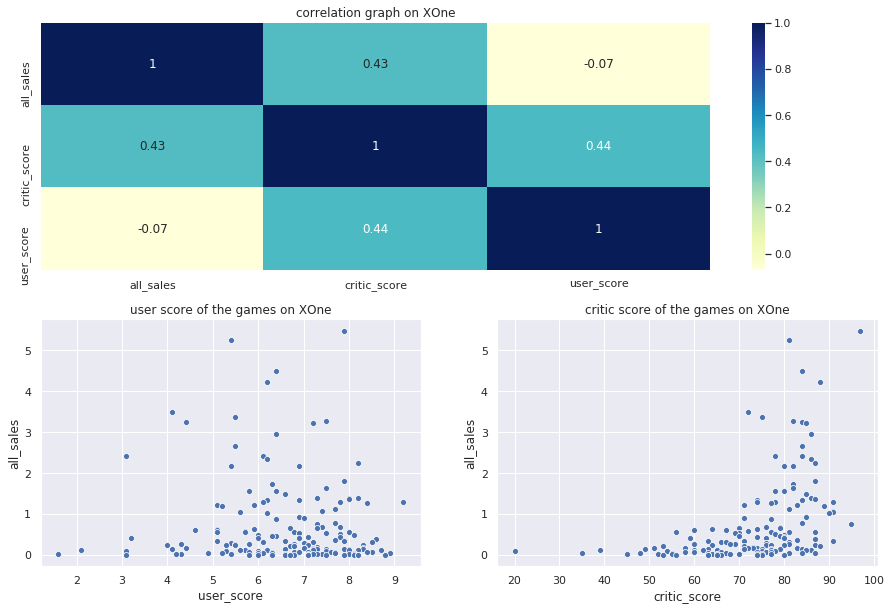

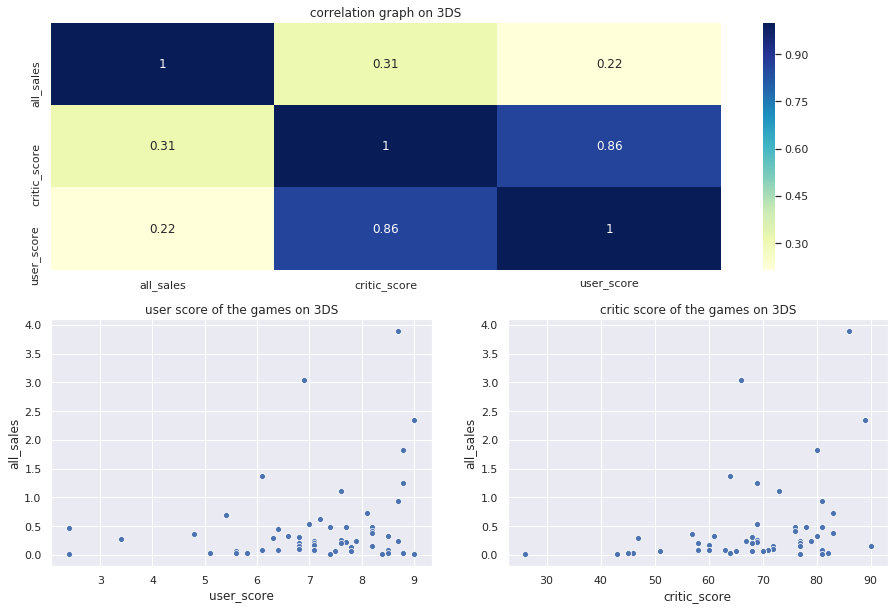

In [52]:
for element in list_platform_perp:
    scatter_sales(element)

Как видно из графиков, для всех платформ нет линейной зависимости объема продаж игр от рейтинга пользователей, зато завимость объем продаж от рейтинга критиков более выражена, то есть игры с большим объемом продаж имеют высокий рейтинг у кинокритиков, а с низким - нет. 

Игроки прислушиваются к мнению критиков при покупке игры, но потом могут разочароваться после. И как правило, рейтинг критиков появляется раньше, чем формируется пользовательский, поэтому рейтинг различается. 

Таким образом, можно сделать вывод, что на объем продаж больше влияет рейтинг критиков, чем рейтинг пользователей.

Если же смотреть на таблицу коррелиции, то видно, что оценки критиков больше влияет на продажи, оценка пользователь совершенно не влияет, даже есть некоторая отрицательная корреляция. Скорее всего при высокой оценке критиков игры, получаются лучшие продажи, но и разочарование пользователей также может быть сильнее на этом фоне.

Мнение критиков и пользователе больше всего совпадает на мобильной платформе 3DS, тогда как на других популярных платформах оно коррелирует на коэффициент не более чем 0.55.

### Анализ объема продаж в разрезе жанров

Рассмотрим теперь объем продаж в разрезе жанров игр.

Построим график распределения игр в разрезе жанров.

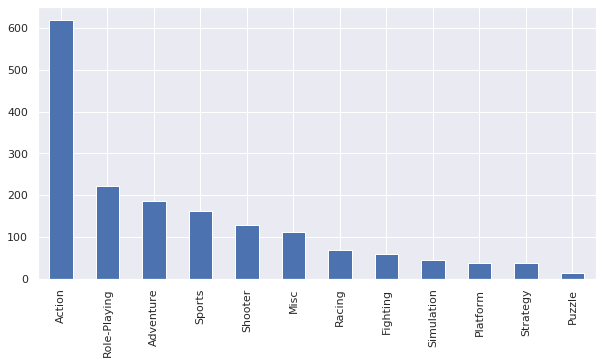

In [53]:
df['genre'].value_counts().plot(kind = 'bar', figsize = (10, 5))

Больше всего выпускается игр в жанре Actions, затем с большим отрывом идут такие жанры как Role-Playing, Adventure, Sports, Shooter и Misc, затем идут менее часто выпускаемые игры - Racing, Fighting, Platform, Simulation, Strategy и Puzzle.

Теперь посмотрим, какие жанры больше всего продаются.

In [54]:
pivot_genre = df.groupby(['genre'])['all_sales'].agg(['count', 'sum']).sort_values(by = 'sum', ascending = False)
pivot_genre

,count,sum
genre,,
Action,619,199.36
Shooter,128,170.94
Sports,161,109.48
Role-Playing,221,101.44
Misc,113,37.55
Fighting,60,28.22
Racing,69,27.52
Platform,38,18.09
Adventure,185,17.55


In [55]:
pivot_genre_mean =\
df.groupby(['genre'])['all_sales'].agg(['mean', 'median']).sort_values(by = 'mean', ascending = False)
pivot_genre_mean

,mean,median
genre,,
Shooter,1.335469,0.515
Sports,0.680000,0.180
Platform,0.476053,0.140
Fighting,0.470333,0.125
Role-Playing,0.459005,0.110
Racing,0.398841,0.090
Misc,0.332301,0.090
Action,0.322068,0.090
Simulation,0.298409,0.100


Построим график, строящий средние и медианные продажи игр в разрезе жанров.

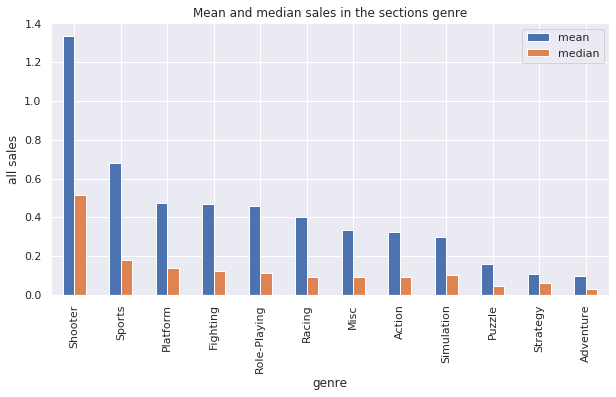

In [56]:
pivot_genre_mean.plot(kind = 'bar', figsize = (10, 5))
plt.ylabel('all sales')
plt.title('Mean and median sales in the sections genre')
plt.show()

Больше всего дохода с большим отрывом приносят игры жанра Shooter, далее идут игры жанров Sports, Platform, Fighting и замыкает пятерку ролевые игры.

Рассмотрим диаграммы размаха в разрезе жанров.

Text(0.5, 1.0, 'Sales in the sections Genres')

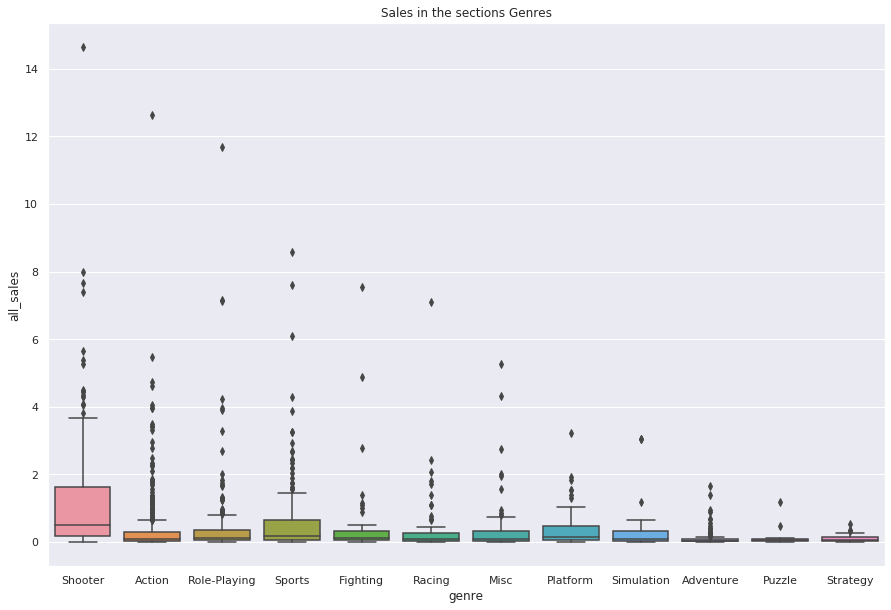

In [57]:
sns.set(rc={"figure.figsize": (15, 10)})

sns.boxplot(data = df, y = 'all_sales', x = 'genre')
plt.title('Sales in the sections Genres')

Самый прибыльный жанр является shooter.

Text(0.5, 1.0, 'Sales in the sections Genres')

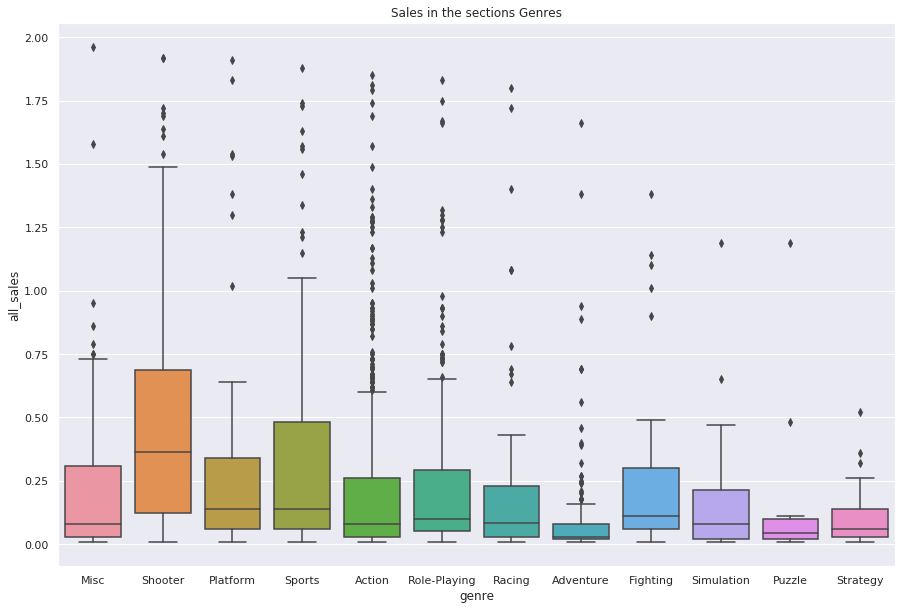

In [58]:
sns.set(rc={"figure.figsize": (15, 10)})

sns.boxplot(data = df.query('all_sales < 2'), y = 'all_sales', x = 'genre')
plt.title('Sales in the sections Genres')

По данным диаграмм размаха больше всего дохода с большим отрывом приносят игры жанра Shooter, далее идут игры жанров Sports, Platform, Fighting и замыкает пятерку ролевые игры.

### Составление портрета пользователя для каждого региона

Выясним отдельно для каждого региона (NA, EU, JP) самые популярные платформы и жанры игр, а также и влияет ли рейтинг ESRB на продажи.

Напишем функцию, которая выводит несколько таблиц рядом.

In [59]:
from IPython.core.display import display, HTML

def display_side_by_side(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0"
    display(HTML(output))

Теперь напишем функцию, которая вычисляет интересующие нас параметры для отдельного региона.

In [60]:
def region_preferences(region):
    pivot_platform = df.groupby('platform')[region].agg(['count', \
                                                         'sum']).sort_values(by = 'sum', ascending = False).head()
    pivot_genre = df.groupby('genre')[region].agg(['count', 'sum']).sort_values(by = 'sum', ascending = False).head()

    display_side_by_side([pivot_platform, pivot_genre], ['Top-5 platform', 'Top-5 genres'])
    ax1 = pivot_platform.plot(kind = 'pie', figsize = (10, 5), y = 'sum', legend = False)
    ax2 = pivot_genre.plot(kind = 'pie', figsize = (10, 5), y = 'sum', legend = False)
    plt.show()

Рассмотрим портрет пользователя региона Северной Америки.

,count,sum
platform,,
PS4,376,98.61
XOne,228,81.27
X360,111,28.3
3DS,212,22.64
PS3,219,22.05
,count,sum
genre,,
Shooter,128,79.02
Action,619,72.53


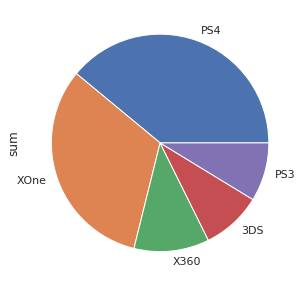

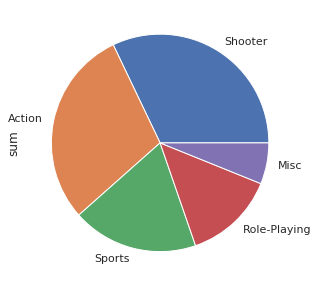

In [61]:
region_preferences('na_sales')

Как видно из полученных данных пользователи из Северной Америки:
* Предпочитают играть на консоляx. Самая популярная консоль - это PS4, через нее больше всего игр покупали пользователи данного региона, а втором и третьем месте стоят консоли фирмы Microsoft - XOne и X360. Затем идет портативная консоль 3DS от фирмы Nintendo и замыкает пятерку консоль PS3. Пользователи из Северной Америки половину рынка отдают консолям серии PS, на втором месте по популярности находятся консоли серии XBox  от компании Microsoft, а среди портативных консолей лидирует консоль 3DS от фирмы Nintendo.


* По объему продаж лидирует с большим отрывом жанр Shooter, затем идут Actions, Sports, Role-Playing и замыкает пятерку жанр Misc.

Рассмотрим пользователя из Европы:

,count,sum
platform,,
PS4,376,130.04
XOne,228,46.25
PS3,219,25.54
PC,151,17.97
3DS,212,16.12
,count,sum
genre,,
Action,619,74.68
Shooter,128,65.52


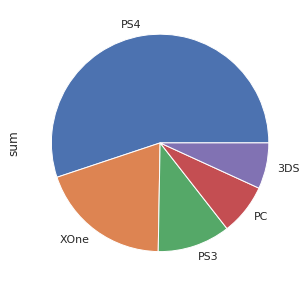

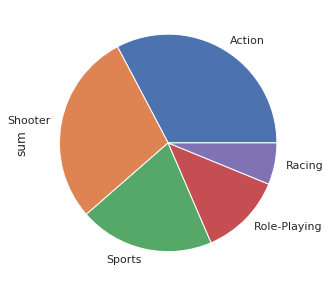

In [62]:
region_preferences('eu_sales')

Итак, пользователи из Европы:
* Также как и пользователи из Северной Америки предпочитают играть на консоляx, но отдают предпочтение больше консолям фирмы Sony. Самая популярная консоль - это PS4, она занимает больше половины рынка, затем идут консоли XOne и PS3,  далее идут игры для персональных компьютеров и замыкает пятерку также портативная консоль 3DS от фирмы Nintendo. Пользователи из Европы больше любят играть на консолях фирмы Sony, а потом уже на консолях фирмы Microsoft. Но в отличие от пользователей из Северной Америки пользователи Европы еще отдают предпочтение и играм на PC.


* Среди самых популярных жанров игр лидирует жанр Action, затем идут Shooter, Sports, Role-Playing и замыкает пятерку жанр Racing. Жанровые предпочтения Европы совпадают с предпочтениями пользователей Северной Америки, единственное отличие - это вместo жанра Misc пользователи Европы отдают предпочтение жанру Racing.

Рассмотрим теперь пользователей из Японии.

,count,sum
platform,,
3DS,212,44.24
PS4,376,15.02
PSV,295,14.54
PS3,219,11.22
WiiU,73,7.31
,count,sum
genre,,
Role-Playing,221,31.16
Action,619,29.58


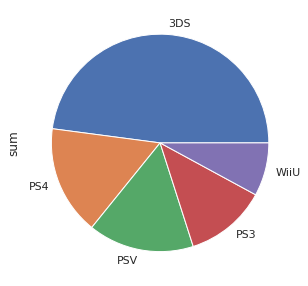

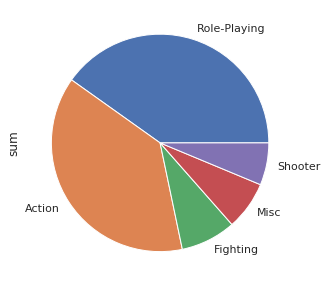

In [63]:
region_preferences('jp_sales')

Сделаем выводы для пользователей из Японии:
* В отличие от пользователей Северной Америки и Европы пользователи из Японии больше всего любят играть на портативных консолях. В рейтинге у данных пользователей на первом месте стоят портативная консоль 3DS, потом идет консоль PS4, а на третьем месте опять же появляется портативная консоль PSV, на четвертом месте - PS3, а на пятом WiiU. Как и пользователи Северной Америки пользователи Японии предпочитают консоли отечественного производителя - Nintendo. Он у них на первом и пятом местах. Остальные места делят консоли от фирмы Sony, платформы от фирмы Microsoft пользователи из японии не жалуют.


* Среди самых популярных жанров игр лидирует с  жанр Role-Playing, затем идут Action, Fighting, Misc и замыкает пятерку жанр Shooter. Жанровые предпочтения пользователей из Японии совпадают с пользователями из Европы и Северной Америки по жанрам Role-Playing, Action, Shooter и Misc. Жанры, которые популярны только среди пользователей из Японии - это Fighting. 

Теперь рассмотрим влияет ли рейтинг ESRB на продажи по регионам. Создадим сводную таблицу по суммарным продажам игр в разрезе рейтинга ESRB.

In [64]:
df['rating'] = df['rating'].fillna('unraiting')

In [65]:
pivot_esrb = df.pivot_table(index='rating', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = ['sum'])
pivot_esrb

sum                  
          eu_sales jp_sales na_sales
rating                              
E            58.06     8.94    50.74
E10+         26.16     4.46    33.23
M            93.44     8.01    96.42
T            34.07    14.78    38.95
unraiting    58.95    56.90    64.72

Отсортируем нашу сводную таблицу по объему продаж.

In [66]:
pivot_esrb.columns = pivot_esrb.columns.map('_'.join)
pivot_esrb.columns

Index(['sum_eu_sales', 'sum_jp_sales', 'sum_na_sales'], dtype='object')

In [67]:
pivot_esrb.sort_values(by = 'sum_na_sales', ascending = False, inplace = True)
pivot_esrb = pivot_esrb[['sum_na_sales', 'sum_eu_sales', 'sum_jp_sales']]
pivot_esrb

,sum_na_sales,sum_eu_sales,sum_jp_sales
rating,,,
M,96.42,93.44,8.01
unraiting,64.72,58.95,56.90
E,50.74,58.06,8.94
T,38.95,34.07,14.78
E10+,33.23,26.16,4.46


Выведим столбчатую диаграмму общего объема продаж по регионам в разрезе рейтинга ESRB.

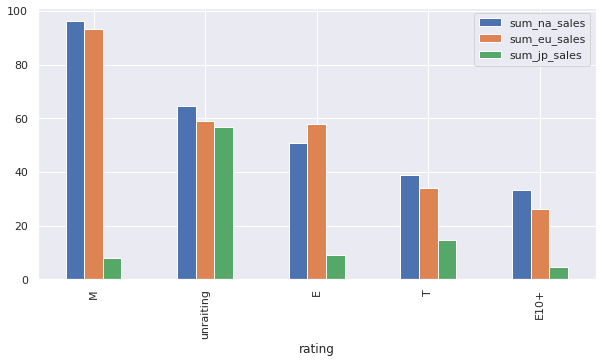

In [68]:
pivot_esrb.plot(kind = 'bar', figsize = (10, 5))

Согласно ESRB игры содержат следующие категории:
* M ('Mature') — игры для взрослых, материалы не подходят для лиц, не достигших 17 лет.
* E ('Everyone') — игры для всех, содержание подходит для детей, достигших 6 лет.
* E10+ ('Everyone 10 and older') —  игры для всех от 10 лет и старше.
* T ('Teen') — игры для подростков, игра подходит для лиц от 13 лет. 

Данная организация ориентирована на рвнок США и Канады. Она больше всего ориентирована на западный рынок.

Как видно из диаграммы в Северной Америке и Европе данные по объему продаж имеют прямую корреляцию согласно рейтингу: больше всего продаж игр с категорией M, для взрослых, потом игры категории E - игры для всех, следующие идут для детей, достигших 10-летнего возраста и самые малочисленнаая категория - это игры для подростков.

Львиная доля игр в Японии не имеет рейтинга ESRB. По данному рейтингу определить возрастную аудиторию пользователей из Японии можно только для меньше чем для половины купленных игр. 

### Вывод

1. Наиболее потециально прибыльные платформы  являются:
* PC - популярна в Европе, имеет свою нишу, несмотря на падение продаж.
* Sony PlayStation 4 - последняя версия самой популярной в Северной Америке, Европе и Японии консоли.
* Microsoft Xbox One - последняя версия популярной в Северной Америке и Европе консоли.
* Nintendo 3DS - последняя версия самой популярной портативной консоли.


2. На объем продаж больше влияет рейтинг критиков, чем рейтинг пользователей.


3. Больше всего дохода с большим отрывом приносят игры жанра Shooter, далее идут игры жанров Sports, Platform, Fighting и замыкает пятерку ролевые игры.

4. Портреты пользователей для каждого региона:

* Предпочитают играть на консоляx. Самая популярная консоль - это PS4, через нее больше всего игр покупали пользователи данного региона, а втором и третьем месте стоят консоли фирмы Microsoft - XOne и X360. Затем идет портативная консоль 3DS от фирмы Nintendo и замыкает пятерку консоль PS3. Пользователи из Северной Америки половину рынка отдают консолям серии PS, на втором месте по популярности находятся консоли серии XBox от компании Microsoft, а среди портативных консолей лидирует консоль 3DS от фирмы Nintendo. По объему продаж лидирует с большим отрывом жанр Shooter, затем идут Actions, Sports, Role-Playing и замыкает пятерку жанр Misc.


* Также как и пользователи из Северной Америки предпочитают играть на консоляx, но отдают предпочтение больше консолям фирмы Sony. Самая популярная консоль - это PS4, она занимает больше половины рынка, затем идут консоли XOne и PS3, далее идут игры для персональных компьютеров и замыкает пятерку также портативная консоль 3DS от фирмы Nintendo. Пользователи из Европы больше любят играть на консолях фирмы Sony, а потом уже на консолях фирмы Mамыкает пятерку жанр Racing. Жанровые предпочтения Европы совпадают с предпочтениями пользователей Северной Америки, единственное отличие - это вместo жанра Misc пользователи Европы отдают предпочтение жанру Racing.


* В отличие от пользователей Северной Америки и Европы пользователи из Японии больше всего любят играть на портативных консолях. В рейтинге у данных пользователей на первом месте стоят портативная консоль 3DS, потом идет консоль PS4, а на третьем месте опять же появляется портативная консоль PSV, на четвертом месте - PS3, а на пятом WiiU. Как и пользователи Северной Америки пользователи Японии предпочитают консоли отечественного производителя - Nintendo. Он у них на первом и пятом местах. Остальные места делят консоли от фирмы Sony, платформы от фирмы Microsoft пользователи из японии не жалуют. Среди самых популярных жанров игр лидирует с жанр Role-Playing, затем идут Action, Fighting, Misc и замыкает пятерку жанр Shooter. Жанровые предпочтения пользователей из Японии совпадают с пользователями из Европы и Северной Америки по жанрам Role-Playing, Action, Shooter и Misc. Жанры, которые популярны только среди пользователей из Японии - это Fighting

5. Пользователи из Северной Америке и Европы имеют схожие предпочтения: больше всего продаж игр с категорией M, для взрослых, потом игры категории E - игры для всех, следующие идут для детей, достигших 10-летнего возраста и самые малочисленнаая категория - это игры для подростков. Львиная доля игр в Японии не имеет рейтинга ESRB. По данному рейтингу определить возрастную аудиторию пользователей из Японии можно только для меньше чем для половины купленных игр.icrosoft. Но в отличие от пользователей из Северной Америки пользователи Европы еще отдают предпочтение и играм на PC. Среди самых популярных жанров игр лидирует жанр Action, затем идут Shooter, Sports, Role-Playing и з

## Проверка гипотез

Проверим гипотезы об популярности игр в разрезе платформ и жанров. Сформулируем нулевую гипотезу.

* Средние пользовательские рейтинги платформ XBox One и PC равны.

Альтернативная гипотеза будет означать, что средние рейтинги платформ XBox One и PC не равны друг другу.

Посмотрим средний рейтинг игр для платформ  XBox One и PC.

In [69]:
df.query('platform == "PC" or platform == "XOne"').groupby('platform')['user_score'].agg(['count','mean','median'])

,count,mean,median
platform,,,
PC,122,6.298361,6.8
XOne,165,6.594545,6.8


При просмотре средних и медианных рейтингов мы видим, что рейтинги почти одинаковые. Проверим нашу нулевую гипотезу с помощью двухстороннего теста ttest_ind,  вычисляет значение p-value, по которому далее мы можем определить равенство двух совокупностей. Зададим пороговое значение alpha = 0.05.

In [70]:
from scipy import stats as st
pc_user_score = df.query('platform == "PC"')['user_score'].dropna()
xone_user_score = df.query('platform == "XOne"')['user_score'].dropna()
    
result =  st.ttest_ind(pc_user_score, xone_user_score) 
result.pvalue

0.10450507919348415

In [71]:
result.pvalue < 0.05

False

Нам не удалось опровергнуть нулевую гипотезу, поэтому мы принимаем нулевую гипотезу, что средние рейтинги платформ PC и XOne равны.

Теперь сформулируем следующую гипотезу.

* Средние пользовательские рейтинги жанров Action и Sports равны друг другу.


Альтернативная гипотеза будет означать, что средние пользовательские рейтинги жанров sports и actions не равны друг другу.

Посмотрим средний рейтинг игр для жанров Action и Sports.

In [72]:
df.query('genre == "Action" or genre == "Sports"').groupby('genre')['user_score'].agg(['count','mean','median'])

,count,mean,median
genre,,,
Action,297,6.760606,7.1
Sports,127,5.225197,5.5


При просмотре средних и медианных рейтингов мы видим, что рейтинги отличаются. Проверим нашу нулевую гипотезу с помощью двухстороннего теста ttest_ind. Зададим пороговое значение alpha = 0.05.

In [73]:
action_user_score = df.query('genre == "Action"')['user_score'].dropna()
sports_user_score = df.query('genre == "Sports"')['user_score'].dropna()
    
result2 =  st.ttest_ind(action_user_score, sports_user_score) 
result2.pvalue

2.8711147985105864e-19

In [74]:
result2.pvalue < 0.05

True

Нам удалось опровергнуть нулевую гипотезу, поэтому принимаем альтернативную гипотезу, что рейтинги жанров sports и actions не равны друг другу.

### Вывод

* Гипотеза о равенстве средних пользовательских рейтингов платформ XBox One и PC подтвердилась.
* Гипотеза о равенстве средних пользовательских рейтингов жанров Action и Sports не подтвердилась. Рейтинг игр жанра Action выше, чем средний рейтинг игр жанра Sports.

## Вывод

1. Наиболее потециально прибыльные платформы являются:
* PC - популярна в Европе, имеет свою нишу, несмотря на падение продаж.
* Sony PlayStation 4 - последняя версия самой популярной в Северной Америке, Европе и Японии консоли.
* Microsoft Xbox One - последняя версия популярной в Северной Америке и Европе консоли.
* Nintendo 3DS - последняя версия самой популярной портативной консоли.

2. На объем продаж больше влияет рейтинг критиков, чем рейтинг пользователей.


3. Больше всего дохода с большим отрывом приносят игры жанра Shooter, далее идут игры жанров Sports, Platform, Fighting и замыкает пятерку ролевые игры.

4. Портреты пользователей для каждого региона:

* Пользователь из Северной Америки - это взрослый, играющий в игры жанра Shooter, Action, Sports, Role-Playing и Misc предпочтительно на консоли серии PS4 или чуть реже на XOne, может играть на PC, а если играет на портативной консоли, то на 3DS.


* Пользователь из Европы - это взрослый, играющий в игры жанра Action, Shooter, Sports, Role-Playing и Racing предпочтительно на консоли серии PS или реже на XBox, если играет на портативной консоли, то на 3DS.


* Пользователь из Японии - это подросток или взрослый, играющий в игры жанра Role-Playing, Action, Misc, Fighting или Shooter на портативной консоли предпочтительно 3DS или чуть реже на PSV, если играет на обычной консоли, то в PS4 или WiiU. 


5. Гипотеза о равенстве средних пользовательских рейтингов платформ XBox One и PC подтвердилась.


6. Гипотеза о равенстве средних пользовательских рейтингов жанров Action и Sports не подтвердилась.  Рейтинг игр жанра Action выше, чем средний рейтинг игр жанра Sports.

